In [4]:
import numpy as np
from rsciio import bruker, emd, digitalmicrograph
from jupyterlab_h5web import H5Web
import h5py
from matplotlib import pyplot as plt
import xraydb
from ase.data import chemical_symbols

In [11]:
xray_lines = {}
for symbol in chemical_symbols[1:]:
    # print(f"{symbol}")
    for name, line in xraydb.xray_lines(symbol).items():
        xray_lines[f"{symbol}-{name}"] = line.energy
        # print(f"{name}, {line.energy} eV")
print(len(xray_lines))

def get_xray_line_candidates(e_min=1200., e_max=1250.):
    cand = []
    for key, val in xray_lines.items():
        if val < e_min:
            continue
        if val > e_max:
            continue
        cand.append(key)
    return cand

print(get_xray_line_candidates())

1807
['Mg-Ka3', 'Ge-Lb1', 'Ge-Lb6', 'Se-Ln', 'Se-Ll', 'Pm-Mg', 'Gd-Mb', 'Tb-Ma', 'Lu-Mz']


In [12]:
src = "/home/kaiobach/Research/paper_paper_paper/scidat_nomad_ebsd/bb_analysis/data/development_spctrscpy"
fnms = [("ikz", "VInP_108_L2.h5"),
        ("ikz", "GeSn_13.nxs"),
        ("bruker", "pynx/46_ES-LP_L1_brg.bcf"),
        ("emd", "pynx/1613_Si_HAADF_610_kx.emd"),
        ("digitalmicrograph", "pynx/EELS_map_2_ROI_1_location_4.dm3"),
        ("oxfordinstruments", "pynx/H5OINA_examples_Specimen_1_Map_EDS_+_EBSD_Map_Data_2.h5oina"),
        ("pdi", "InGaN_nanowires_spectra.edaxh5")]
# pyUSID, HSMA
case = 0  # len(fnms) - 1
fnm = f"{src}/{fnms[case][0]}/{fnms[case][1]}"
print(fnm)

/home/kaiobach/Research/paper_paper_paper/scidat_nomad_ebsd/bb_analysis/data/development_spctrscpy/ikz/VInP_108_L2.h5


In [14]:
H5Web(fnm)

<jupyterlab_h5web.widget.H5Web object>

In [16]:
with h5py.File(fnm, "r") as h5r:
    src = "/VInP/VInP_108_L2/Area 10/LineScan 1/ROIs/"
    for key in h5r[src].keys():
        tmp = h5r[f"{src}/{key}"]
        print(f"{type(tmp)}, {np.shape(tmp)}, {tmp.dtype}")

<class 'h5py._hl.dataset.Dataset'>, (200,), int32
<class 'h5py._hl.dataset.Dataset'>, (200,), int32
<class 'h5py._hl.dataset.Dataset'>, (200,), int32


<class 'numpy.ndarray'>, (200, 1024), int32
0		In L		849
0		K K		752
0		P K		938
1		In L		857
1		K K		786
1		P K		1004


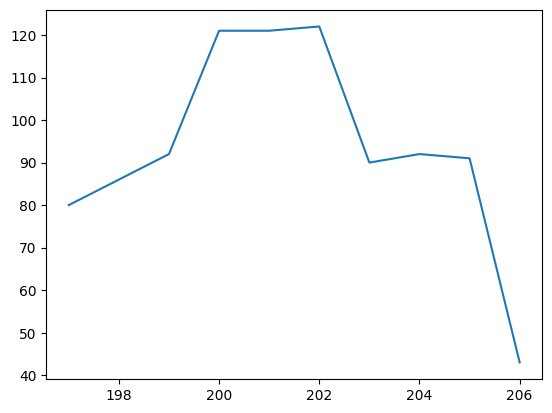

In [46]:
with h5py.File(fnm, "r") as h5r:
    # src = "/InGaN_nanowires_spectra/InGaN nanowires/Area 1/Full Area 1"
    src = "/VInP/VInP_108_L2/Area 10/LineScan 1/"
    if f"{src}/LSD" in h5r.keys():
        # for key, val in enumerate(h5r[f"{src}/LSD"].attrs.items()):
        #     print(f"{key}, {val}")
        tmp = np.asarray(h5r[f"{src}/LSD"][0])
        print(f"{type(tmp)}, {np.shape(tmp)}, {tmp.dtype}")
        for idx in np.arange(0, 2):
            # src/ROIs/<element Xray line> is the integral
            print(f"{idx}\t\tIn L\t\t{np.sum(tmp[idx,323:335 + 1])}")
            print(f"{idx}\t\tK K\t\t{np.sum(tmp[idx,326:337 + 1])}")
            print(f"{idx}\t\tP K\t\t{np.sum(tmp[idx,197:206 + 1])}")
        # plt.plot(np.arange(323, 335 + 1), tmp[0,323:335 + 1])
        plt.plot(np.arange(197, 206 + 1), tmp[0,197:206 + 1])
    # for idx, val in enumerate(tmp.dtype.names):
    #     print(f"{idx}, {val}, {tmp[val][0]}")

    """
    if f"{src}/SPC" in h5r.keys():
        spc = np.asarray(h5r[f"{src}/SPC"])
    # print(f"{type(spc)}, {np.shape(spc)}, {spc.dtype}")
    reqs = ["eVOffset", "evPch"]  # , "evPerChannel", "DeadTime", "CountRate"]
    for req in reqs:  # ""SpectrumCounts", "
        if req in spc.dtype.names:
            print(f"{req}, {spc[req][0]}")
        else:
            raise ValueError(f"Unable to find metadata entry {req}!")
    # for idx, val in enumerate(spc.dtype.names):
    #     print(f"{idx}, {val}, {spc[val][0]}")
    print("DataStart" in spc.dtype.names)
    print(f"{type(spc['SpectrumCounts'][0])}, {np.shape(spc['SpectrumCounts'][0])}, {spc['SpectrumCounts'][0].dtype}")  # [0])
    """

In [35]:
plt.plot(dat[0, :])

NameError: name 'dat' is not defined

In [24]:

from typing import Dict


class NxObject:
    """An object in a graph e.g. an attribute, dataset, or group in NeXus."""

    def __init__(self,
                 name: str = None,
                 unit: str = None,
                 dtype=str,
                 value=None,
                 **kwargs):
        if (name is not None) and (name == ""):
            raise ValueError(f"Value for argument name needs to be a non-empty string !")
        if (unit is not None) and (unit == ""):
            raise ValueError(f"Value for argument unit needs to be a non-empty string !")
        if (dtype is not None) and isinstance(dtype, type) is False:
            raise ValueError(f"Value of argument dtype must not be None " \
                             f" and a valid, ideally a numpy datatype !")
        # self.doc = None  # docstring
        self.name = name  # name of the field
        self.unit = unit  # not unit category but actual unit
        # use special values "unitless" for NX_UNITLESS (e.g. 1) and
        # "dimensionless" for NX_DIMENSIONLESS (e.g. 1m / 1m)
        self.dtype = dtype  # use np.dtype if possible
        if value is None or dtype is str:
            self.unit = "unitless"
        if value is not None:
            self.value = value
        # value should be a numpy scalar, tensor, or string if possible
        self.eqv_hdf = None
        if "eqv_hdf" in kwargs:
            if kwargs["eqv_hdf"] in ["group", "dataset", "attribute"]:
                self.eqv_hdf = kwargs["eqv_hdf"]
            else:
                raise ValueError(f"Value of keyword argument eqv_hdf needs to be one of grp, dset, attr !")

    def __repr__(self):
        """Report values."""
        return f"Name: {self.name}, unit: {self.unit}, dtype: {self.dtype}, eqv_hdf: {self.eqv_hdf}"


In [29]:
NX_IMAGE_REAL_SPACE_SET_HDF_PATH = ["image_oned/axis_x-field",
"image_oned/axis_x@long_name-attribute",
"image_oned/intensity-field",
"image_threed/axis_x-field",
"image_threed/axis_x@long_name-attribute",
"image_threed/axis_y-field",
"image_threed/axis_y@long_name-attribute",
"image_threed/axis_z-field",
"image_threed/axis_z@long_name-attribute",
"image_threed/intensity-field",
"image_twod/axis_x-field",
"image_twod/axis_x@long_name-attribute",
"image_twod/axis_y-field",
"image_twod/axis_y@long_name-attribute",
"image_twod/intensity-field",
"stack_oned/axis_image_identifier-field",
"stack_oned/axis_image_identifier@long_name-attribute",
"stack_oned/axis_x-field",
"stack_oned/axis_x@long_name-attribute",
"stack_oned/intensity-field",
"stack_threed/axis_image_identifier-field",
"stack_threed/axis_image_identifier@long_name-attribute",
"stack_threed/axis_x-field",
"stack_threed/axis_x@long_name-attribute",
"stack_threed/axis_y-field",
"stack_threed/axis_y@long_name-attribute",
"stack_threed/axis_z-field",
"stack_threed/axis_z@long_name-attribute",
"stack_threed/intensity-field",
"stack_twod/axis_image_identifier-field",
"stack_twod/axis_image_identifier@long_name-attribute",
"stack_twod/axis_x-field",
"stack_twod/axis_x@long_name-attribute",
"stack_twod/axis_y-field",
"stack_twod/axis_y@long_name-attribute",
"stack_twod/intensity-field"]

class NxEmImageRealSpaceSet():
    def __init__(self):
        self.tmp: Dict = {}
        for entry in NX_IMAGE_REAL_SPACE_SET_HDF_PATH:
            if entry.endswith("-field") is True:
                self.tmp[entry[0:len(entry)-len("-field")]] = NxObject(eqv_hdf="dataset")
            elif entry.endswith("-attribute") is True:
                self.tmp[entry[0:len(entry)-len("-attribute")]] = NxObject(eqv_hdf="attribute")
            else:
                self.tmp[entry[0:len(entry)-len("-group")]] = NxObject(eqv_hdf="group")

In [31]:
tmp = NxEmImageRealSpaceSet()
# print(tmp.tmp)

{'image_oned/axis_x': Name: None, unit: unitless, dtype: <class 'str'>, eqv_hdf: dataset, 'image_oned/axis_x@long_name': Name: None, unit: unitless, dtype: <class 'str'>, eqv_hdf: attribute, 'image_oned/intensity': Name: None, unit: unitless, dtype: <class 'str'>, eqv_hdf: dataset, 'image_threed/axis_x': Name: None, unit: unitless, dtype: <class 'str'>, eqv_hdf: dataset, 'image_threed/axis_x@long_name': Name: None, unit: unitless, dtype: <class 'str'>, eqv_hdf: attribute, 'image_threed/axis_y': Name: None, unit: unitless, dtype: <class 'str'>, eqv_hdf: dataset, 'image_threed/axis_y@long_name': Name: None, unit: unitless, dtype: <class 'str'>, eqv_hdf: attribute, 'image_threed/axis_z': Name: None, unit: unitless, dtype: <class 'str'>, eqv_hdf: dataset, 'image_threed/axis_z@long_name': Name: None, unit: unitless, dtype: <class 'str'>, eqv_hdf: attribute, 'image_threed/intensity': Name: None, unit: unitless, dtype: <class 'str'>, eqv_hdf: dataset, 'image_twod/axis_x': Name: None, unit: un

In [39]:
with h5py.File(fnm, "r") as h5r:
    src = "/VInP/VInP_108_L2/Area 10/VInP/VInP_108_L2/Area 10/Live Map 1"
    if f"{src}/FOVIMAGECOLLECTIONPARAMS" in h5r.keys():
        ipr = np.asarray(h5r[f"{src}/FOVIPR"])
    print(f"{type(ipr)}, {np.shape(ipr)}, {ipr.dtype}")
    print(ipr["MicronsPerPixelY"][0])

<class 'numpy.ndarray'>, (1,), {'names': ['Version', 'ImageType', 'Label', 'SMin', 'SMax', 'Par_Color', 'EdsPresetMode', 'EdsPresetTime', 'EdsMapDataType', 'TiltCorrected', 'RasterMode', 'ChannelStart', 'ChannelEnd', 'IntDummy1', 'IAdc', 'ISize', 'IBits', 'NReads', 'NFrames', 'FDwell', 'KVolt', 'Tilt', 'TakeOff', 'Magnification', 'WorkingDistance', 'MicronsPerPixelX', 'MicronsPerPixelY', 'NumberOfCommentLines', 'TextLines', 'Fpar1', 'NOverlayElements', 'OverlayColors', 'XmpEdiTimeCnst', 'Fpar'], 'formats': ['<i2', '<i2', ('u1', (8,)), '<i2', '<i2', '<i2', '<i2', '<i4', '<i2', '<i2', '<i2', '<i2', '<i2', '<i4', '<i2', '<i2', '<i2', '<i2', '<i2', '<f4', '<i2', '<i2', '<i2', '<i4', '<i2', '<f4', '<f4', '<i2', ('u1', (128,)), ('<f4', (4,)), '<i2', ('<i2', (16,)), '<f4', ('<f4', (2,))], 'offsets': [0, 2, 4, 12, 14, 16, 18, 20, 24, 26, 28, 30, 32, 36, 40, 42, 44, 46, 48, 52, 56, 58, 60, 64, 68, 72, 76, 80, 82, 212, 228, 230, 264, 268], 'itemsize': 276}
0.4090192


In [77]:
with h5py.File(fnm, "r") as h5r:
    src = "/VInP/VInP_108_L2/Area 10/Live Map 1"
    trg = "SPD"
    reqs = ["MicronPerPixelX", "MicronPerPixelY", "NumberOfLines", "NumberOfPoints", "NumberofChannels"]
    for req in reqs:
        if req not in h5r[f"{src}/{trg}"].attrs.keys():
            # also check for shape
            raise ValueError(f"Required attribute named {req} not found in {src}/{trg} !")
    nyxe = {"y": h5r[f"{src}/{trg}"].attrs["NumberOfLines"][0],
            "x": h5r[f"{src}/{trg}"].attrs["NumberOfPoints"][0],
            "e": h5r[f"{src}/{trg}"].attrs["NumberofChannels"][0]}
    print(nyxe)
    # the native APEX SPD concept instance is a two-dimensional array of arrays of length e (n_energy_bins)
    # likely EDAX has in their C(++) code a vector of vector or something equivalent either way we faced
    # nested C arrays of the base data type (here (u)int 16
    # even worse, chunked in HDF5 thus the e-long arrays are just some payload inside the compressed
    # chunk without some extra logic to resolve the third (energy) dimension:
    # how to reshape this efficiently without creating unnecessary copies
    # the following code is ugly as it needs a maximum large copy of the dataset
    spd_edax = h5r[f"{src}/{trg}"]
    print(f"edax: {np.shape(spd_edax)}, {type(spd_edax)}, {spd_edax.dtype}")
    spd_naive = np.zeros((nyxe["y"], nyxe["x"], nyxe["e"]), "<i2")
    spd_chunk = np.zeros((nyxe["y"], nyxe["x"], nyxe["e"]), "<i2")
    # spd = spd_edax.view().reshape((400, 512, 1000))
    
    chk_one = [(0, 102), (102, 102 + 102), (102 + 102, 102 + 102 + 102), (102 + 102 + 102, 400)]
    print(chk_one)
    chk_two = [(0, 512), (0, 512), (0, 512), (0, 512)]
    print(chk_two)
    for chk_idx in np.arange(0, 4):
        print(f"{chk_idx}")
        spd_chunk[chk_one[chk_idx][0]:chk_one[chk_idx][1], chk_two[chk_idx][0]:chk_two[chk_idx][1], :] \
            = spd_edax[chk_one[chk_idx][0]:chk_one[chk_idx][1], chk_two[chk_idx][0]:chk_two[chk_idx][1]]
    print("Chunking down")   
    for one in np.arange(0, 400):
        print(f"{one}")
        for two in np.arange(0, 512):
            spd_naive[one, two, :] = spd_edax[one, two]
    print("Naive done")
   
    if False is True:        
        img.tmp["image_twod/intensity"] = np.reshape(np.asarray(h5r[f"{src}/FOVIMAGE"]), (nyx["y"], nyx["x"]))
    
        syx = {"x": 1., "y": 1.}
        scan_unit = {"x": "px", "y": "px"}
        if f"{src}/FOVIMAGECOLLECTIONPARAMS" in h5r.keys():
            ipr = np.asarray(h5r[f"{src}/FOVIPR"])
            syx = {"x": ipr["MicronsPerPixelX"][0], "y": ipr["MicronsPerPixelY"][0]}
            scan_unit = {"x": "µm", "y": "µm"}
        dims = ["y", "x"]
        for dim in dims:
            img.tmp[f"image_twod/axis_{dim}"] = np.asarray(np.linspace(0, nyx[dim] - 1, num=nyx[dim], endpoint=True) * syx[dim], np.float64)
            img.tmp[f"image_twod/axis_{dim}@long_name"] = f"Calibrated pixel position along {dim} ({scan_unit[dim]})"
    
        for key, val in img.tmp.items():
            if key.startswith("image_twod"):
                print(f"{key}, {val}")

{'y': 400, 'x': 512, 'e': 1000}
edax: (400, 512), <class 'h5py._hl.dataset.Dataset'>, ('<i2', (1000,))
[(0, 102), (102, 204), (204, 306), (306, 400)]
[(0, 512), (0, 512), (0, 512), (0, 512)]
0
1
2
3
Chunking down
0
1
2
3
4
5
6
7
8
9
10
11


KeyboardInterrupt: 

In [78]:
diff = spd_chunk[0:10, :, :] - spd_naive[0:10, :, :]

In [105]:
with h5py.File(fnm, "r") as h5r:
    src = "/VInP/VInP_108_L2/Area 10/Live Map 1"
    cps = h5r[f"{src}/CPS"]
    print(cps.chunks)
    spd = h5r[f"{src}/SPD"]
    print(spd.chunks)
    print(h5r[f"{src}/SPD"][0, 0].dtype)
    spd_chunk = np.zeros((nyxe["y"], nyxe["x"], nyxe["e"]), h5r[f"{src}/SPD"][0, 0].dtype)
    print(spd_chunk.dtype)

None
(102, 512)
int16
int16


In [87]:
chk_bnds = {"x": [], "y": []}
ifo = {"ny": 400,
       "cy": spd.chunks[0],
       "nx": 512,
       "cx": spd.chunks[1]}
for dim in ["y", "x"]:
    idx = 0
    while idx < ifo[f"n{dim}"]:
        if idx + ifo[f"c{dim}"] < ifo[f"n{dim}"]:
            chk_bnds[f"{dim}"].append((idx, idx + ifo[f"c{dim}"]))
        else:
            chk_bnds[f"{dim}"].append((idx, ifo[f"n{dim}"]))
        idx += ifo[f"c{dim}"]
for key, val in chk_bnds.items():
    print(f"{key}, {val}")

x, [(0, 512)]
y, [(0, 102), (102, 204), (204, 306), (306, 400)]


In [ ]:
    #    plt.imshow(fov, interpolation='nearest')
    #    plt.show()
    #    print(f"{type(cmpd)}, {np.shape(cmpd)}, {cmpd.dtype}")
    #    print(cmpd["DetectorLabel"][0].decode("utf8"))

In [5]:
report_all_plugins = False
if report_all_plugins is True:
    for plugin in rsciio.IO_PLUGINS:
        print(f"\n\n")
        for key, val in plugin.items():
            print(f"{key}, {val}")

In [6]:
objs = bruker.file_reader(f"{src}/{fnms[2][1]}")
# objs = emd.file_reader(f"{src}/{fnms[3][1]}")
# objs = digitalmicrograph.file_reader(f"{src}/{fnms[4][1]}")
if isinstance(objs, list) is True:
    for entry in objs:
        print(f"Loading type(entry) {type(entry)}")
        if isinstance(entry, dict) is True:
            for key, val in entry.items():
                print(key)
                print(val)   

Loading type(entry) <class 'dict'>
axes
[{'name': 'height', 'offset': 0, 'scale': 0.00351909256747931, 'units': 'µm', 'size': 512}, {'name': 'width', 'offset': 0, 'scale': 0.00351909256747931, 'units': 'µm', 'size': 512}]
metadata
{'Acquisition_instrument': {'TEM': {'beam_energy': 200, 'magnification': 56000}}, 'Sample': {'name': 'map 4'}, 'Signal': {}, 'General': {'title': 'HAADF', 'original_filename': '46_ES-LP_L1_brg.bcf'}}
original_metadata
{'Microscope': {'HV': 200, 'WD': -1, 'Mag': 56000, 'DX': 0.00351909256747931, 'DY': 0.00351909256747931, 'Flags': 16776960, 'XmlClassType': 'TRTSEMData'}, 'DSP Configuration': {'ImageWidth': 512, 'ImageHeight': 512, 'PixelAverage': 60, 'LineAverage': 1, 'SEBitCount': 16, 'ChannelCount': 4, 'ChannelName0': 'BF', 'ChannelName1': 'DF', 'ChannelName2': 'DF4', 'Channel3': 1, 'ChannelName3': 'HAADF', 'CounterIndex': 0, 'CounterChannelUsed': 0, 'TiltAngle': 0, 'CounterMode': 0, 'PixelTime': 1, 'XmlClassType': 'TRTDSPConfiguration'}, 'Stage': {'State': 

In [ ]:
# https://codereview.stackexchange.com/a/21035
# https://stackoverflow.com/questions/38852822/how-to-flatten-xml-file-in-python
from collections import OrderedDict

def flatten_dict(d):
    def items():
        for key, value in d.items():
            # nested subtree
            if isinstance(value, dict):
                for subkey, subvalue in flatten_dict(value).items():
                    yield '{}.{}'.format(key, subkey), subvalue
            # nested list
            elif isinstance(value, list):
                for num, elem in enumerate(value):
                    for subkey, subvalue in flatten_dict(elem).items():
                        yield '{}.[{}].{}'.format(key, num, subkey), subvalue
            # everything else (only leafs should remain)
            else:
                yield key, value
    return OrderedDict(items())

import xmltodict

In [ ]:
with Image.open(fnm, mode="r") as fp:
    fp.load()  # Needed only for .png EXIF data (see citation above)
    if "MicroscopeControlImage" in fp.info.keys():
        # print(fp.info["MicroscopeControlImage"])
        xml_content = xmltodict.parse(fp.info["MicroscopeControlImage"])
        flattened_xml = flatten_dict(xml_content)
        for k,v in flattened_xml.items():
            print('{} = {}'.format(k,v))
    elif fnm.lower().endswith(".png") is True:  # check for mime type instead
        print(f"There is no iTXt chunk in {fnm} which has embedded XML within the AXON namespace MicroscopeControlImage!")
    else:
        print(f"There is nothing to harvest here!")

***

In [ ]:
# handle TIFF
with Image.open(fnm, mode="r") as fp:
    for key in fp.tag_v2:
        if key in [34118, 34119]:
            print(type(fp.tag[key]))
            print(len(fp.tag[key]))        
            # print(f"{key}, {fp.tag[key]}")
        if key not in TAGS.keys():
            print(f"--->tag {key}, is not in PIL.TiffTAGS !")
    # self.tags = {TAGS[key] : fp.tag[key] for key in fp.tag_v2}
    # for key, val in self.tags.items():
    #     print(f"{key}, {val}")
    nparr = np.array(fp)
    print(f"{type(nparr)}")
    print(f"{nparr.dtype}")
    print(f"{np.shape(nparr)}")

In [ ]:
with Image.open(fnm, mode="r") as fp:
    if True is False:
        czi_keys = [34118, 34119]
        for czi_key in czi_keys:
            if czi_key in fp.tag_v2:
                print(f"Found czi_key {tfs_key}...")
                utf = fp.tag[czi_key]
                print(type(utf))
                if len(utf) == 1:
                    print(utf[0])
    # exit(1)
    tfs_keys = [34682]
    for tfs_key in tfs_keys:
        if tfs_key in fp.tag_v2:
            print(f"Found tfs_key {tfs_key}...")
            utf = fp.tag[tfs_key]
            print(type(utf))
            if len(utf) == 1:
                print(utf[0])

In [ ]:
import numpy as np
# https://www.geeksforgeeks.org/python-program-to-sort-a-list-of-tuples-by-second-item/
def sort_tuple(tup):
    # convert the list of tuples to a numpy array with data type (object, int)
    arr = np.array(tup, dtype=[('col1', object), ('col2', int)])
    # get the indices that would sort the array based on the second column
    indices = np.argsort(arr['col2'])
    # use the resulting indices to sort the array
    sorted_arr = arr[indices]
    # convert the sorted numpy array back to a list of tuples
    sorted_tup = [(row['col1'], row['col2']) for row in sorted_arr]
    return sorted_tup

In [ ]:
def if_str_represents_float(s):
    try:
        return isinstance(float(s), float)
        # return str(float(s)) == s
    except ValueError:
        return False

In [ ]:
"10".isdigit()
# isinstance(float("8.99306e-010"), float)


In [ ]:
# TFS sections based on IKZ ALN_baoh_021.tif example
import mmap

tfs_section_names = ["[User]",
                     "[System]",
                     "[Beam]",
                     "[EBeam]",                 
                     "[GIS]",
                     "[Scan]",
                     "[EScan]",
                     "[Stage]",
                     "[Image]",
                     "[Vacuum]",
                     "[Specimen]",
                     "[Detectors]",
                     "[T2]",
                     "[Accessories]",
                     "[EBeamDeceleration]",
                     "[CompoundLensFilter]",
                     "[PrivateFei]",
                     "[HiResIllumination]",
                     "[EasyLift]",
                     "[HotStageMEMS]",
                     "[HotStage]",
                     "[HotStageHVHS]",
                     "[ColdStage]"]

tfs_section_details = {"[System]": ["Type", "Dnumber", "Software", "BuildNr", "Source", "Column", "FinalLens", "Chamber", "Stage", "Pump",
              "ESEM", "Aperture", "Scan", "Acq", "EucWD", "SystemType", "DisplayWidth", "DisplayHeight"]}
tfs_section_offsets = {}

with open(fnm, 'rb', 0) as file:
    s = mmap.mmap(file.fileno(), 0, access=mmap.ACCESS_READ)
    for section_name in tfs_section_names:
        pos = s.find(bytes(section_name, "utf8"))  # != -1
        tfs_section_offsets[section_name] = pos
    print(tfs_section_offsets)

    # define search offsets
    tpl = []
    for key, value in tfs_section_offsets.items():
        tpl.append((key, value))
    # print(tpl)
    tpl = sort_tuple(tpl)
    print(tpl)
    # if section_name == "[System]":
    pos_s = None
    pos_e = None
    for idx in np.arange(0, len(tpl)):
        if tpl[idx][0] != "[System]":
            continue
        else:
            pos_s = tpl[idx][1]
            if idx <= len(tpl) - 1:
                pos_e = tpl[idx + 1][1]
            break
    print(f"Search in between byte offsets {pos_s} and {pos_e}")
    # fish metadata of e.g. the system section
    section_metadata = {}
    for term in tfs_section_details["[System]"]:
        
        s.seek(pos_s, 0)
        pos = s.find(bytes(term, "utf8"))
        if pos < pos_e:  # check if pos_e is None
            s.seek(pos, 0)
            section_metadata[f"{term}"] = f"{s.readline().strip().decode('utf8').replace(f'{term}=', '')}"
            if if_str_represents_float(section_metadata[f"{term}"]) is True:
                section_metadata[f"{term}"] = np.float64(section_metadata[f"{term}"])
            elif section_metadata[f"{term}"].isdigit() is True:
                section_metadata[f"{term}"] = np.int64(section_metadata[f"{term}"])
            else:
                pass
            # print(f"{term}, {pos}, {pos + len(term) + 1}")
    #        tfs_section_offswr
    #        file.seek(pos, 0)  #
    print(section_metadata)

In [ ]:
'2'.isdigit()